# Viisualizations_COVID

## Content
- [GENERAL](#GENERAL)
- [MUESTRAS](#MUESTRAS)

## Goal of visualization

## TODOs:
- Check the joins between all tables
- Look redshift
- look spark
- Save to S3
- Bash for aws cp


## Summary about  each dataset


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import requests
import matplotlib
import re
from sodapy import Socrata

#'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 
#'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 
#'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
#'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel',
#'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

idx_pd = pd.IndexSlice

### GENERAL
[Volver](#Exploring_COVID)

**Columns:**
- **'fecha_de_notificaci_n:'** Fecha de notificación de resultado positivo
- **'c_digo_divipola:'** Codigo DIVIPOLA (usado para hacer join luego con el censo)
- **'ciudad_de_ubicaci_n:'** Ciudad de Ubicación
- **'departamento:'** Departamento
- **'atenci_n:'** Tipo de atención
- **'edad:'** Edad de la persona
- **'sexo:'** Sexo
- **'tipo:'** Tipo
- **'estado:'** Estado de salud de la persona
- **'pa_s_de_procedencia:'** País de procedencia
- **'fis:'** Fecha Inicio de Sintomas
- **'fecha_diagnostico:'** Fecha de diagnostico
- **'fecha_recuperado:'** Fecha de recuperación
- **'fecha_reporte_web:'** Fecha de reporte en la Web
- **'tipo_recuperaci_n:'** Tipo de recuperación
- **'codigo_departamento:'** Codigo del departamento
- **'codigo_pais:'** Codigo del pais
- **'pertenencia_etnica:'** Pertenencia etnica
- **'nombre_grupo_etnico:'** Nombre grup etnico
- **'fecha_de_muerte:'** Fecha de muerte

**Preprocessing**
- Set index id_de_caso
- Create new column for "Asintomatico"
- Change dtypes of columns (Dates, ints, strings)
- Get DIVIPOLA codefor department and city.

In [26]:
client = Socrata("www.datos.gov.co", None)
results = client.get("gt2j-8ykr", limit=1000000)
df = pd.DataFrame.from_records(results)

In [27]:
df = df.set_index("id_de_caso", drop=True)

In [28]:
df["Asintomatico"] = (df["fis"]=="Asintomático").astype(int)

In [29]:
df.loc[df["fis"]=="Asintomático", "fis"] = np.nan

In [30]:
df = df.astype({'fecha_de_notificaci_n': np.datetime64,
                'c_digo_divipola': str,
                'ciudad_de_ubicaci_n': str,
                'departamento': str,
                'atenci_n': str,
                'edad': np.int64,
                'sexo': str,
                'tipo': str,
                'estado': str,
                'pa_s_de_procedencia': str,
                'fis': np.datetime64,
                'fecha_diagnostico': np.datetime64,
                'fecha_recuperado': np.datetime64,
                'fecha_reporte_web': np.datetime64,
                'tipo_recuperaci_n': str,
                "codigo_departamento": str,
                "codigo_pais": str,
                "pertenencia_etnica": str,
                'fecha_de_muerte': np.datetime64})

In [31]:
df["divipola_dpto"] = df["c_digo_divipola"].str[:2].astype(int)
df["divipola_mpio"] = df["c_digo_divipola"].str[2:].astype(int)

In [32]:
df.head()

,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte,Asintomatico,divipola_dpto,divipola_mpio
id_de_caso,,,,,,,,,,,,,,,,,,,,,,,
1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27,2020-03-06,2020-03-13,2020-03-06,PCR,11,380,Otro,NaN,NaT,0,11,1
2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04,2020-03-09,2020-03-19,2020-03-09,PCR,76,724,Otro,NaN,NaT,0,76,111
3,2020-03-07,05001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29,2020-03-09,2020-03-15,2020-03-09,PCR,5,724,Otro,NaN,NaT,0,5,1
4,2020-03-09,05001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,nan,2020-03-06,2020-03-11,2020-03-26,2020-03-11,PCR,5,nan,Otro,NaN,NaT,0,5,1
5,2020-03-09,05001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,nan,2020-03-08,2020-03-11,2020-03-23,2020-03-11,PCR,5,nan,Otro,NaN,NaT,0,5,1


In [33]:
df["rango_edad"] = pd.cut(df["edad"], np.arange(0, 110, 10))

In [34]:
df["rango_edad"] = df["rango_edad"].astype(str)

In [35]:
total_por_rango_de_edad = df.groupby(["rango_edad"])["estado"].agg(["count"])

In [36]:
total_por_rango_de_edad

,count
rango_edad,
"(0.0, 10.0]",5691
"(10.0, 20.0]",11866
"(20.0, 30.0]",34778
"(30.0, 40.0]",34245
"(40.0, 50.0]",23147
"(50.0, 60.0]",19071
"(60.0, 70.0]",11208
"(70.0, 80.0]",6111
"(80.0, 90.0]",2964


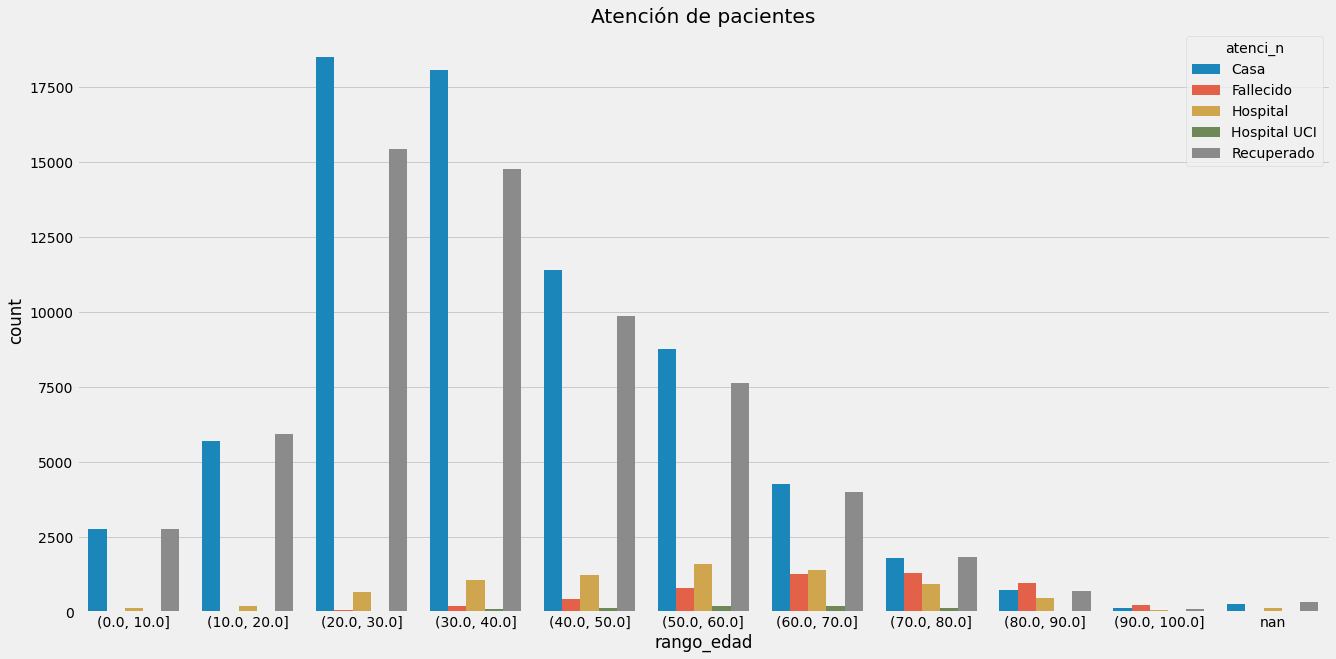

In [37]:
aux = df.groupby(["rango_edad", "atenci_n"])["atenci_n"].agg(["count"])
ex = aux.rename(columns={"atenci_n": "count"}).reset_index()
ex = ex.rename(columns={0: "count"})
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="atenci_n", 
                 data=ex[ex["atenci_n"].isin(["Recuperado", "Fallecido", "Hospital UCI", "Hospital", "Casa"])], ax=ax)
ax.set_title("Atención de pacientes")
plt.show()

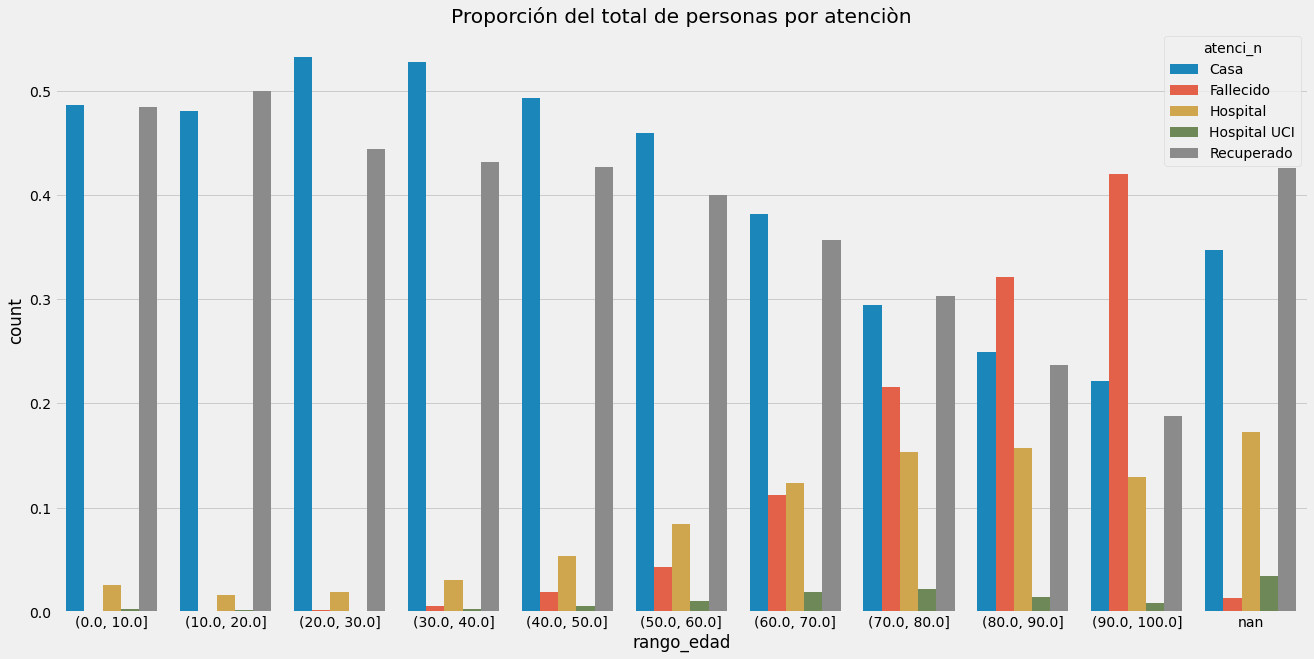

In [38]:
aux = df.groupby(["rango_edad", "atenci_n"])["atenci_n"].agg(["count"])
aux = aux.loc[:,:]/total_por_rango_de_edad
ex = aux.rename(columns={"atenci_n": "count"}).reset_index()
ex = ex.rename(columns={0: "count"})
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="atenci_n", 
                 data=ex[ex["atenci_n"].isin(["Recuperado", "Fallecido", "Hospital UCI", "Hospital", "Casa"])], ax=ax)
ax.set_title("Proporción del total de personas por atenciòn")
plt.show()

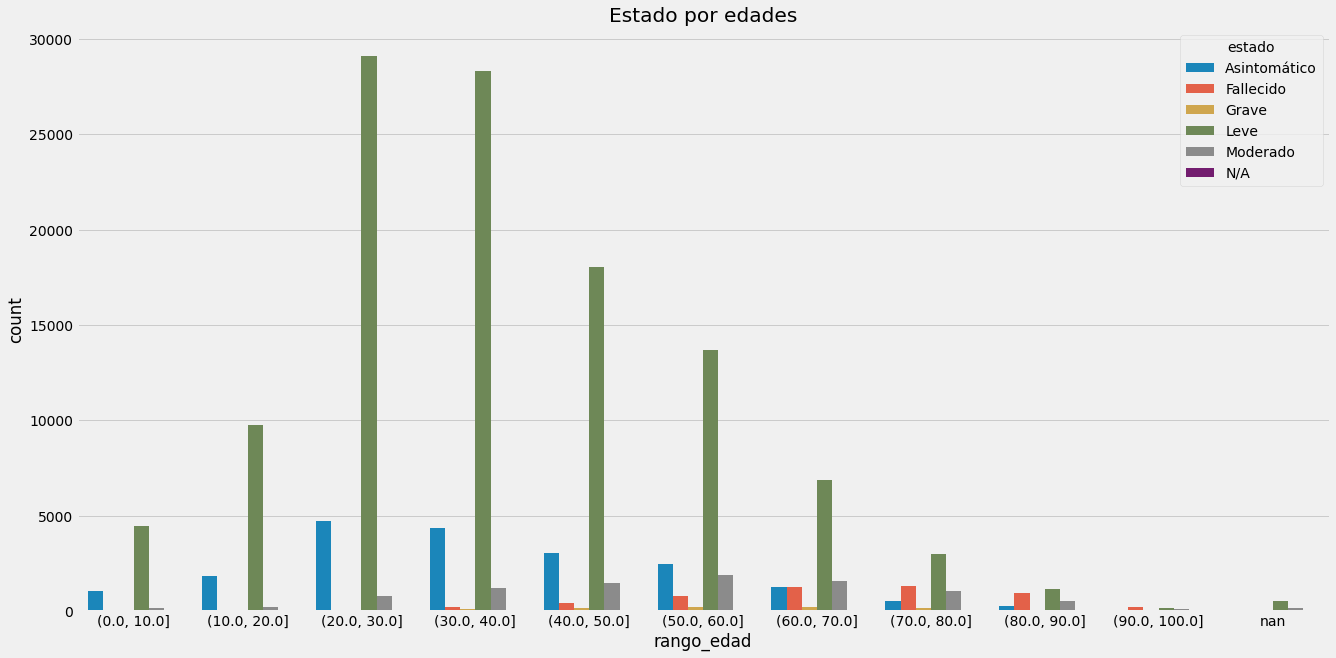

In [39]:
aux = df.groupby(["rango_edad", "estado"])["estado"].agg(["count"])
ex = aux.rename(columns={"estado": "count"}).reset_index()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="estado", 
                 data=ex, ax=ax)
ax.set_title("Estado por edades")
plt.show()

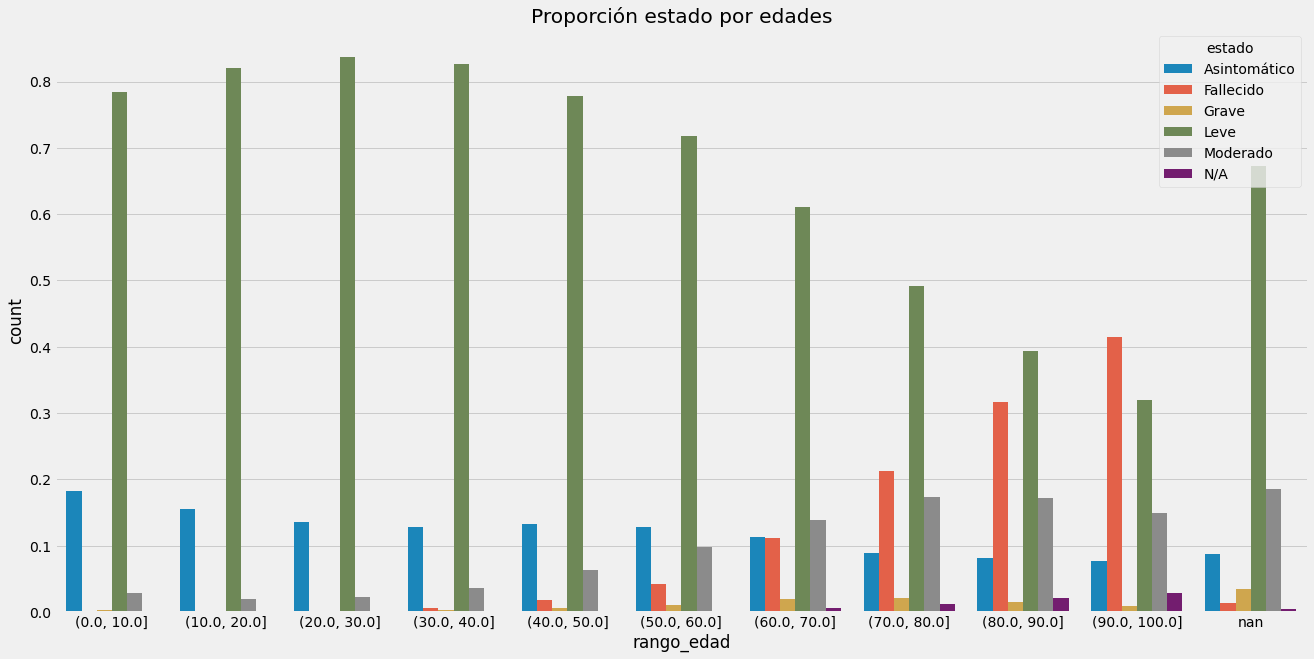

In [40]:
aux = df.groupby(["rango_edad", "estado"])["estado"].agg(["count"])
aux = aux.loc[:,:]/total_por_rango_de_edad
ex = aux.rename(columns={"estado": "count"}).reset_index()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="estado", 
                 data=ex, ax=ax)
ax.set_title("Proporción estado por edades")
plt.show()

# Time series

In [41]:
df

,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte,Asintomatico,divipola_dpto,divipola_mpio,rango_edad
id_de_caso,,,,,,,,,,,,,,,,,,,,,,,,
1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27,2020-03-06,2020-03-13,2020-03-06,PCR,11,380,Otro,NaN,NaT,0,11,1,"(10.0, 20.0]"
2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04,2020-03-09,2020-03-19,2020-03-09,PCR,76,724,Otro,NaN,NaT,0,76,111,"(30.0, 40.0]"
3,2020-03-07,05001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29,2020-03-09,2020-03-15,2020-03-09,PCR,5,724,Otro,NaN,NaT,0,5,1,"(40.0, 50.0]"
4,2020-03-09,05001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,nan,2020-03-06,2020-03-11,2020-03-26,2020-03-11,PCR,5,nan,Otro,NaN,NaT,0,5,1,"(50.0, 60.0]"
5,2020-03-09,05001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,nan,2020-03-08,2020-03-11,2020-03-23,2020-03-11,PCR,5,nan,Otro,NaN,NaT,0,5,1,"(20.0, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150481,2020-07-06,11001,Bogotá D.C.,Bogotá D.C.,Casa,30,M,En estudio,Leve,nan,2020-06-22,2020-07-12,NaT,2020-07-12,nan,11,nan,nan,NaN,NaT,0,11,1,"(20.0, 30.0]"
150482,2020-07-09,66001,Pereira,Risaralda,Hospital,22,F,En estudio,Moderado,nan,2020-06-30,2020-07-12,NaT,2020-07-12,nan,66,nan,nan,NaN,NaT,0,66,1,"(20.0, 30.0]"
150483,2020-07-06,66001,Pereira,Risaralda,Casa,16,F,En estudio,Leve,nan,2020-07-06,2020-07-12,NaT,2020-07-12,nan,66,nan,nan,NaN,NaT,0,66,1,"(10.0, 20.0]"


In [42]:
df['atenci_n'].unique()

array(['Recuperado', 'Fallecido', 'Hospital', 'Hospital UCI', 'N/A',
       'Casa'], dtype=object)

In [43]:
df['activos'] = ~df['atenci_n'].isin(['Recuperado', 'Fallecido'])

In [44]:
df

,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte,Asintomatico,divipola_dpto,divipola_mpio,rango_edad,activos
id_de_caso,,,,,,,,,,,,,,,,,,,,,,,,,
1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27,2020-03-06,2020-03-13,2020-03-06,PCR,11,380,Otro,NaN,NaT,0,11,1,"(10.0, 20.0]",False
2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04,2020-03-09,2020-03-19,2020-03-09,PCR,76,724,Otro,NaN,NaT,0,76,111,"(30.0, 40.0]",False
3,2020-03-07,05001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29,2020-03-09,2020-03-15,2020-03-09,PCR,5,724,Otro,NaN,NaT,0,5,1,"(40.0, 50.0]",False
4,2020-03-09,05001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,nan,2020-03-06,2020-03-11,2020-03-26,2020-03-11,PCR,5,nan,Otro,NaN,NaT,0,5,1,"(50.0, 60.0]",False
5,2020-03-09,05001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,nan,2020-03-08,2020-03-11,2020-03-23,2020-03-11,PCR,5,nan,Otro,NaN,NaT,0,5,1,"(20.0, 30.0]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150481,2020-07-06,11001,Bogotá D.C.,Bogotá D.C.,Casa,30,M,En estudio,Leve,nan,2020-06-22,2020-07-12,NaT,2020-07-12,nan,11,nan,nan,NaN,NaT,0,11,1,"(20.0, 30.0]",True
150482,2020-07-09,66001,Pereira,Risaralda,Hospital,22,F,En estudio,Moderado,nan,2020-06-30,2020-07-12,NaT,2020-07-12,nan,66,nan,nan,NaN,NaT,0,66,1,"(20.0, 30.0]",True
150483,2020-07-06,66001,Pereira,Risaralda,Casa,16,F,En estudio,Leve,nan,2020-07-06,2020-07-12,NaT,2020-07-12,nan,66,nan,nan,NaN,NaT,0,66,1,"(10.0, 20.0]",True


# Total cases

## By Department

In [47]:
df["Fecha"] = df["fecha_de_notificaci_n"]

In [48]:
total_cases = df.groupby(["departamento", "Fecha"])['edad'].count()\
                    .groupby(level=[0]).cumsum().to_frame().rename(columns={'edad': 'Casos Totales'})
total_cases = total_cases.sort_index(level=[0, 1])
total_cases = total_cases.unstack(1).fillna(method='ffill', axis=1)
total_cases = total_cases.sort_values(by=total_cases.columns[-1], ascending=False)
total_cases.head(10)

Casos Totales                                              \
Fecha                  2020-03-02 2020-03-06 2020-03-07 2020-03-08 2020-03-09   
departamento                                                                    
Bogotá D.C.                   1.0        1.0        1.0        2.0        3.0   
Barranquilla D.E.             NaN        NaN        NaN        NaN        NaN   
Atlántico                     NaN        NaN        NaN        NaN        NaN   
Valle del Cauca               NaN        1.0        1.0        1.0        1.0   
Cartagena D.T. y C.           NaN        NaN        NaN        1.0        1.0   
Antioquia                     NaN        NaN        1.0        1.0        3.0   
Nariño                        NaN        NaN        NaN        NaN        NaN   
Cundinamarca                  NaN        NaN        NaN        NaN        NaN   
Sucre                         NaN        NaN        NaN        NaN        NaN   
Amazonas                      NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fecha               2020-03-10 2020-03-11 2020-03-12 2020-03-13 2020-03-14   
departamento                                                                 
Bogotá D.C.                3.0        8.0       13.0       20.0       26.0   
Barranquilla D.E.          NaN        NaN        NaN        NaN        1.0   
Atlántico                  NaN        NaN        NaN        NaN        NaN   
Valle del Cauca            2.0        2.0        3.0        4.0        8.0   
Cartagena D.T. y C.        1.0        1.0        1.0        3.0        3.0   
Antioquia                  4.0        7.0        9.0        9.0       10.0   
Nariño                     NaN        NaN        NaN        NaN        NaN   
Cundinamarca               NaN        NaN        NaN        NaN        NaN   
Sucre                      NaN        NaN        NaN        NaN        NaN   
Amazonas                   NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fecha               2020-03-15 2020-03-16 2020-03-17 2020-03-18 2020-03-19   
departamento                                                                 
Bogotá D.C.               31.0       40.0       55.0       70.0       90.0   
Barranquilla D.E.          1.0        3.0        3.0        5.0        6.0   
Atlántico                  NaN        NaN        NaN        NaN        NaN   
Valle del Cauca            8.0       11.0       21.0       25.0       33.0   
Cartagena D.T. y C.        5.0        8.0        9.0       13.0       16.0   
Antioquia                 11.0       15.0       23.0       30.0       48.0   
Nariño                     NaN        NaN        NaN        NaN        NaN   
Cundinamarca               2.0        4.0        7.0       11.0       15.0   
Sucre                      NaN        NaN        NaN        NaN        NaN   
Amazonas                   NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fecha               2020-03-20 2020-03-21 2020-03-22 2020-03-23 2020-03-24   
departamento                                                                 
Bogotá D.C.              119.0      149.0      177.0      234.0      307.0   
Barranquilla D.E.          9.0       12.0       13.0       19.0       24.0   
Atlántico                  1.0        3.0        3.0        3.0        6.0   
Valle del Cauca           46.0       57.0       73.0       83.0      101.0   
Cartagena D.T. y C.       18.0       21.0       25.0       30.0       32.0   
Antioquia                 59.0       62.0       66.0       70.0       84.0   
Nariño                     1.0        1.0        1.0        1.0        4.0   
Cundinamarca              20.0       28.0       32.0       34.0       38.0   
Sucre                      NaN        NaN        NaN        NaN        NaN   


In [49]:
dict_population = {'Bogotá D.C.': 8.181,
                   'Valle del Cauca': 4.708,
                   'Antioquia': 6.690,
                   'Meta': 1.016,
                   'Cartagena D.T. y C.': 0.914,
                   'Cundinamarca': 2.804,
                   'Risaralda': 0.967,
                   'Barranquilla D.E.':1.206,
                   'Santa Marta D.T. y C.': 0.499,
                   'Nariño': 1.809,
                   'Huila': 1.197,
                   'Atlántico': 1.34,
                   'Amazonas': 0.078,
                   'Norte de Santander': 1.391,
                   'Tolima': 1.419,
                   'Quindio': 0.574,
                   'Caldas': 0.993,
                   'Cesar': 1.065,
                   'Santander': 2.09,
                   'Boyacá': 1.281,
                   'Cauca': 1.416,
                   'Magdalena': 0.799,
                   'Córdoba': 1.788,
                   'Buenaventura D.E.': 0.432,
                   'Bolívar': 1.257,
                   'Casanare': 0.375,
                   'Chocó': 0.515,
                   'Caquetá': 0.496,
                   'Archipiélago de San Andrés Providencia y Santa Catalina': 0.078,
                   'La Guajira':1.040,
                   'Sucre': 0.877}

In [50]:
latin_names_plot = total_cases.index.to_list()[:20]

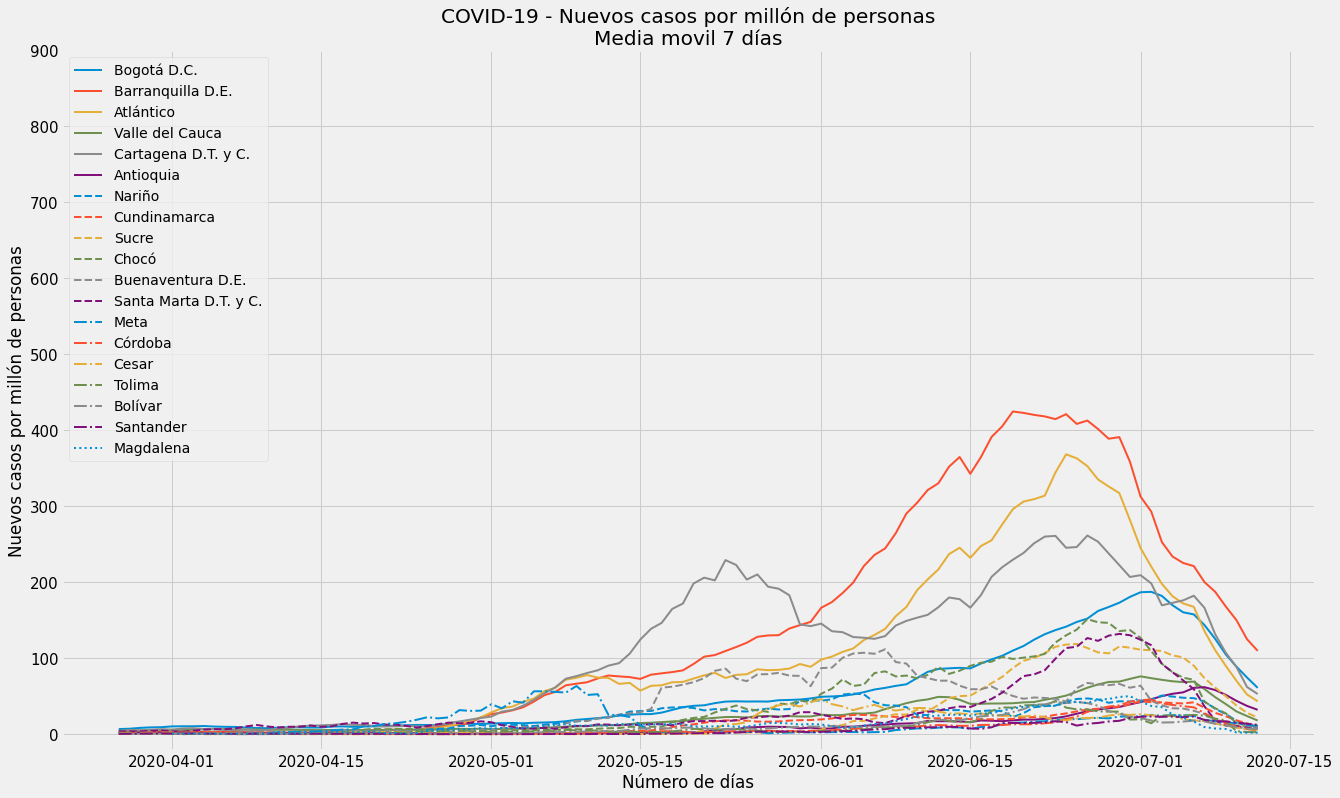

In [52]:
fig, ax = plt.subplots(figsize=(20,12))
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
colors = [f'C{i}' for i in range(6)]

low_cases = 0
high_cases = 2000000
max_periods = 80
ls = 0
count = 0
window = 7
text_loc_y = -3
start = 15
for name in latin_names_plot:
    row = total_cases.loc[name, :][start:]
    if name in latin_names_plot:
        if (row.min()<0.1*high_cases) & (name not in []):
            #current_data = row[(row>=low_cases) & (row<=high_cases)]#/dict_population[name]).rolling(7).mean()
            current_data = row
            current_data = current_data - current_data.shift(1)
            current_data = (current_data/dict_population[name]).rolling(window).mean()
            #current_data = current_data[~current_data.isnull()]
            if current_data.max()>1000:
                continue
            if len(current_data)>0:
                c_i = colors[count]
                ls_i = LINE_STYLES[ls]
                values_to_plot = current_data.values[0:]
                if name in ['Colombia']:
                    ax.plot(current_data.index.levels[1][start:], values_to_plot, label=name, lw=5.5, 
                            linestyle=ls_i, color=c_i, alpha=0.7)
                else:
                    ax.plot(current_data.index.levels[1][start:], values_to_plot, label=name, lw=2., 
                            linestyle=ls_i, color=c_i)
            # Changing colors
            if count>4:
                count=0
                ls+=1
            else:
                count+=1
        else:
            pass
    ax.legend(fontsize=14, loc=2)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_yticks([100*i for i in range(0,10)])
    #ax.set_xticks([1] + list(range(5, max_periods,5)))
    ax.set_xlabel(f'Número de días')
    ax.set_ylabel("Nuevos casos por millón de personas")
    #ax.text(max_periods*0.8, text_loc_y, f'Update: {df.columns[-1]}')
    #ax.text(-1, text_loc_y, 'Fuente:: INS')
    ax.set_title(f"COVID-19 - Nuevos casos por millón de personas\nMedia movil 7 días")
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
plt.show()

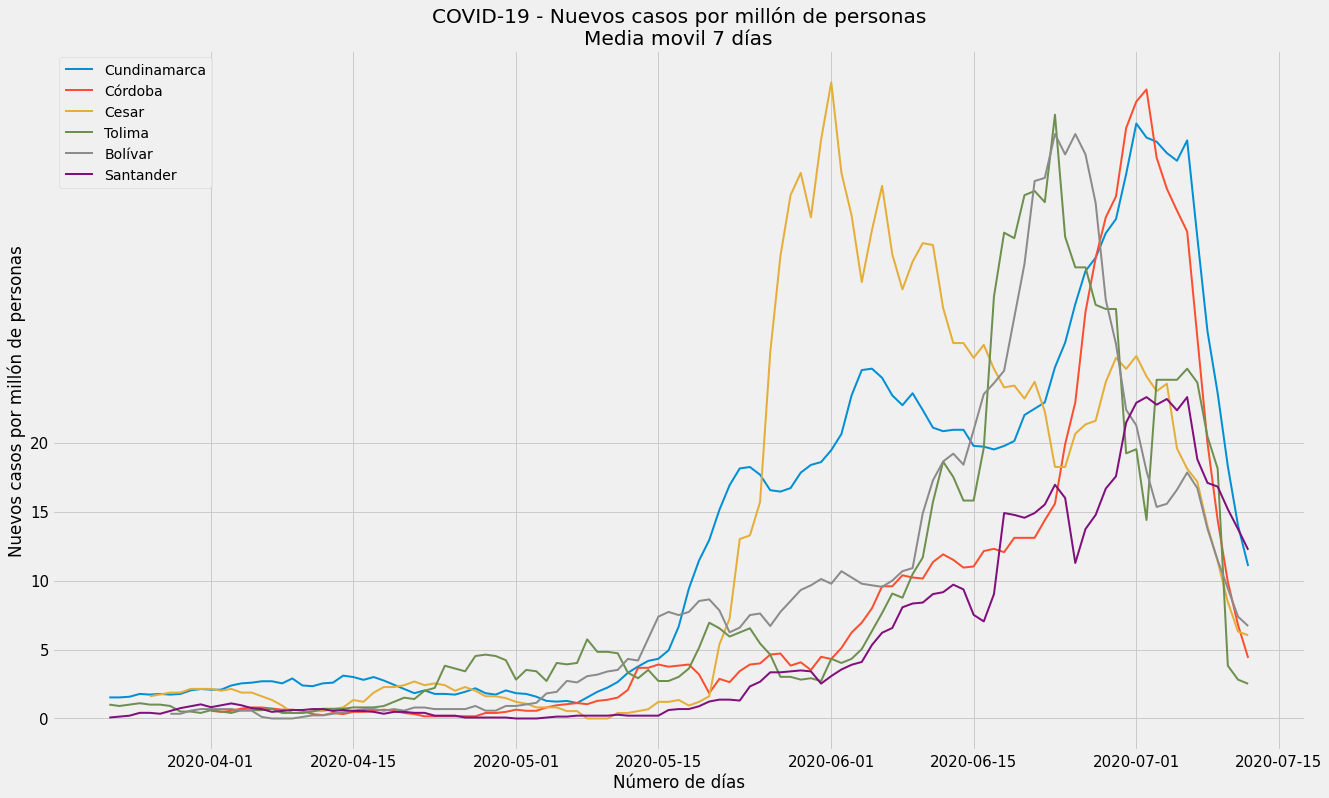

In [54]:
fig, ax = plt.subplots(figsize=(20,12))
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
colors = [f'C{i}' for i in range(6)]

low_cases = 0
high_cases = 2000000
max_periods = 55
ls = 0
count = 0
window = 7
text_loc_y = -3
start = 10
for name in latin_names_plot:
    row = total_cases.loc[name, :][start:]
    if name in latin_names_plot:
        if (row.min()<0.1*high_cases) & (name not in []):
            #current_data = row[(row>=low_cases) & (row<=high_cases)]#/dict_population[name]).rolling(7).mean()
            current_data = row
            current_data = current_data - current_data.shift(1)
            current_data = (current_data/dict_population[name]).rolling(window).mean()
            #current_data = current_data[~current_data.isnull()]
            if current_data.max()>50:
                continue
            if len(current_data)>0:
                c_i = colors[count]
                ls_i = LINE_STYLES[ls]
                values_to_plot = current_data.values[0:]
                if name in ['Colombia']:
                    ax.plot(current_data.index.levels[1][start:], values_to_plot, label=name, lw=5.5, 
                            linestyle=ls_i, color=c_i, alpha=0.7)
                else:
                    ax.plot(current_data.index.levels[1][start:], values_to_plot, label=name, lw=2., 
                            linestyle=ls_i, color=c_i)
            # Changing colors
            if count>4:
                count=0
                ls+=1
            else:
                count+=1
        else:
            pass
    ax.legend(fontsize=14, loc=2)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_yticks([5*i for i in range(0,5)])
    #ax.set_xticks([1] + list(range(5, max_periods,5)))
    ax.set_xlabel(f'Número de días')
    ax.set_ylabel("Nuevos casos por millón de personas")
    #ax.text(max_periods*0.8, text_loc_y, f'Update: {df.columns[-1]}')
    #ax.text(-1, text_loc_y, 'Fuente:: INS')
    ax.set_title(f"COVID-19 - Nuevos casos por millón de personas\nMedia movil 7 días")
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
plt.show()

## By City

In [55]:
total_cases_city = df[df['activos']].groupby(["ciudad_de_ubicaci_n", "Fecha"])['edad'].count()\
                    .groupby(level=[0]).cumsum().to_frame().rename(columns={'edad': 'Casos Activos'})
total_cases_city = total_cases_city.sort_index(level=[0, 1])
total_cases_city = total_cases_city.unstack(1).fillna(method='ffill', axis=1)
total_cases_city = total_cases_city.sort_values(by=total_cases_city.columns[-1], ascending=False)
total_cases_city.head(30)

Casos Activos                                              \
Fecha                  2020-03-21 2020-03-22 2020-03-23 2020-03-24 2020-03-25   
ciudad_de_ubicaci_n                                                             
Bogotá D.C.                   NaN        NaN        NaN        NaN        1.0   
Barranquilla                  NaN        NaN        NaN        NaN        NaN   
Cali                          NaN        NaN        1.0        2.0        3.0   
Cartagena de Indias           NaN        NaN        NaN        2.0        2.0   
Soledad                       1.0        1.0        1.0        1.0        1.0   
Medellín                      NaN        NaN        NaN        NaN        NaN   
Sincelejo                     NaN        NaN        NaN        NaN        NaN   
Santa Marta                   NaN        NaN        NaN        NaN        NaN   
Soacha                        1.0        2.0        2.0        2.0        2.0   
Pasto                         NaN        NaN        NaN        NaN        NaN   
Quibdó                        NaN        NaN        NaN        NaN        NaN   
Malambo                       NaN        NaN        NaN        NaN        NaN   
Espinal                       NaN        NaN        NaN        NaN        NaN   
Baranoa                       NaN        NaN        NaN        NaN        NaN   
Montería                      NaN        NaN        NaN        NaN        NaN   
Galapa                        NaN        NaN        NaN        NaN        NaN   
Buenaventura                  NaN        NaN        NaN        NaN        NaN   
Puerto Colombia               NaN        NaN        NaN        NaN        NaN   
Maicao                        NaN        NaN        NaN        NaN        NaN   
Bello                         NaN        NaN        NaN        NaN        NaN   
Apartadó                      NaN        NaN        NaN        NaN        NaN   
Ituango                       NaN        NaN        NaN        NaN        NaN   
Villavicencio                 NaN        NaN        NaN        NaN        NaN   
Valledupar                    NaN        NaN        NaN        NaN        NaN   
Sabanalarga                   NaN        NaN        NaN        NaN        NaN   
Ciénaga                       NaN        NaN        NaN        NaN        NaN   
Itagüí                        NaN        NaN        NaN        NaN        NaN   
Barrancabermeja               NaN        NaN        NaN        NaN        NaN   
Bucaramanga                   NaN        NaN        NaN        NaN        NaN   
Cúcuta                        NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fecha               2020-03-26 2020-03-27 2020-03-28 2020-03-29 2020-03-31   
ciudad_de_ubicaci_n                                                          
Bogotá D.C.                1.0        1.0        1.0        1.0        2.0   
Barranquilla               NaN        NaN        NaN        NaN        NaN   
Cali                       3.0        4.0        4.0        4.0        6.0   
Cartagena de Indias        2.0        2.0        2.0        3.0        3.0   
Soledad                    1.0        1.0        1.0        1.0        1.0   
Medellín                   NaN        NaN        NaN        NaN        NaN   
Sincelejo                  NaN        NaN        NaN        NaN        NaN   
Santa Marta                NaN        NaN        NaN        NaN        NaN   
Soacha                     2.0        2.0        2.0        2.0        2.0   
Pasto                      NaN        NaN        NaN        NaN        NaN   
Quibdó                     NaN        NaN        NaN        NaN        NaN   
Malambo                    NaN        NaN        NaN        NaN        NaN   
Espinal                    NaN        NaN        NaN        NaN        NaN   
Baranoa                    NaN        NaN        NaN        NaN        NaN   
Montería            

# Active cases

In [56]:
active_cases = df[df['activos']].groupby(["departamento", "Fecha"])['edad'].count()\
                    .groupby(level=[0]).cumsum().to_frame().rename(columns={'edad': 'Casos Totales'})
active_cases = active_cases.sort_index(level=[0, 1])
active_cases = active_cases.unstack(1).fillna(method='ffill', axis=1)
active_cases = active_cases.sort_values(by=active_cases.columns[-1], ascending=False)
active_cases.head(10)

Casos Totales                                              \
Fecha                  2020-03-21 2020-03-22 2020-03-23 2020-03-24 2020-03-25   
departamento                                                                    
Bogotá D.C.                   NaN        NaN        NaN        NaN        1.0   
Barranquilla D.E.             NaN        NaN        NaN        NaN        NaN   
Atlántico                     1.0        1.0        1.0        1.0        1.0   
Valle del Cauca               NaN        NaN        1.0        2.0        3.0   
Antioquia                     NaN        NaN        NaN        NaN        NaN   
Cartagena D.T. y C.           NaN        NaN        NaN        2.0        2.0   
Cundinamarca                  1.0        2.0        2.0        2.0        2.0   
Sucre                         NaN        NaN        NaN        NaN        NaN   
Nariño                        NaN        NaN        NaN        NaN        NaN   
Chocó                         NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fecha               2020-03-26 2020-03-27 2020-03-28 2020-03-29 2020-03-31   
departamento                                                                 
Bogotá D.C.                1.0        1.0        1.0        1.0        2.0   
Barranquilla D.E.          NaN        NaN        NaN        NaN        NaN   
Atlántico                  1.0        1.0        1.0        1.0        1.0   
Valle del Cauca            4.0        5.0        6.0        6.0        8.0   
Antioquia                  NaN        NaN        NaN        NaN        NaN   
Cartagena D.T. y C.        2.0        2.0        2.0        3.0        3.0   
Cundinamarca               2.0        3.0        3.0        3.0        3.0   
Sucre                      NaN        NaN        NaN        NaN        NaN   
Nariño                     NaN        NaN        NaN        NaN        1.0   
Chocó                      NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fecha               2020-04-02 2020-04-03 2020-04-04 2020-04-05 2020-04-06   
departamento                                                                 
Bogotá D.C.                2.0        3.0        4.0        4.0        4.0   
Barranquilla D.E.          NaN        NaN        NaN        NaN        NaN   
Atlántico                  1.0        1.0        1.0        1.0        1.0   
Valle del Cauca            9.0       11.0       11.0       13.0       15.0   
Antioquia                  NaN        NaN        NaN        NaN        1.0   
Cartagena D.T. y C.        3.0        3.0        3.0        3.0        3.0   
Cundinamarca               3.0        3.0        3.0        3.0        3.0   
Sucre                      NaN        NaN        NaN        NaN        1.0   
Nariño                     1.0        1.0        1.0        1.0        1.0   
Chocó                      NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fecha               2020-04-07 2020-04-08 2020-04-09 2020-04-10 2020-04-11   
departamento                                                                 
Bogotá D.C.                4.0        4.0        4.0        4.0        9.0   
Barranquilla D.E.          NaN        NaN        NaN        NaN        NaN   
Atlántico                  2.0        2.0        3.0        3.0        3.0   
Valle del Cauca           15.0       15.0       17.0       18.0       19.0   
Antioquia                  1.0        1.0        1.0        1.0        1.0   
Cartagena D.T. y C.        3.0        3.0        3.0        3.0        4.0   
Cundinamarca               3.0        4.0        4.0        4.0        4.0   
Sucre                      1.0        1.0        1.0        1.0        1.0   
Nariño                     1.0        1.0        1.0        1.0        1.0   


In [57]:
names_to_plot = []
for per_name in total_cases.index.tolist()[:23]:
    if per_name not in names_to_plot:
        names_to_plot.append(per_name)

In [58]:
def plot_history(df, low_cases=1, high_cases=100, max_periods=20, title="Casos totales reportados"):
    fig, ax = plt.subplots(figsize=(20,12))
    LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
    colors = [f'C{i}' for i in range(6)]
    ls = 0
    count = 0
    for name in names_to_plot:
        if name in df.index:
            row = df.loc[name, :]
            if name in names_to_plot:
                if (row.min()<0.1*high_cases) & (name not in []):
                    c_i = colors[count]
                    ls_i = LINE_STYLES[ls]
                    current_data = row[(row>=low_cases) & (row<=high_cases)]
                    if len(current_data)>0:
                        values_to_plot = current_data.values[:max_periods]
                        if name in ['Bogotá D.C.', 'Antioquia', 'Valle del Cauca', "Cartagena D.T. y C.", "Risaralda", "Cundinamarca"]:
                            ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=5.5, 
                                    linestyle=ls_i, color=c_i, alpha=0.5)
                        else:
                            ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=2., 
                                    linestyle=ls_i, color=c_i)
                    # Changing colors
                    if count>4:
                        count=0
                        ls+=1
                    else:
                        count+=1
                else:
                    pass
            ax.legend(fontsize=14, loc=2)
            ax.set_yscale('log')
            ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
            ax.set_yticks([10**i*j*low_cases for j in [1,2,5] for i in np.arange(0, 3, 1.0)])
            ax.set_xticks(range(1, max_periods,1))
            ax.set_xlabel(f'Número de días después de reportas al menos {low_cases} casos')
            ax.set_ylabel(title)
            ax.set_title(f"COVID-19 {title} por Dpto después de reportar por lo menos {low_cases} casos")
            ax.tick_params(axis='both', which='major', labelsize=15)
            ax.tick_params(axis='both', which='minor', labelsize=15)
            ax.text(max_periods*0.8, low_cases*0.5, f'Update: {df.columns[-1][1].strftime(format="%d/%m/%Y")}')
            ax.text(-0.0,low_cases*0.5, 'Fuente: Instituto Nacional de Salud')
    plt.show()

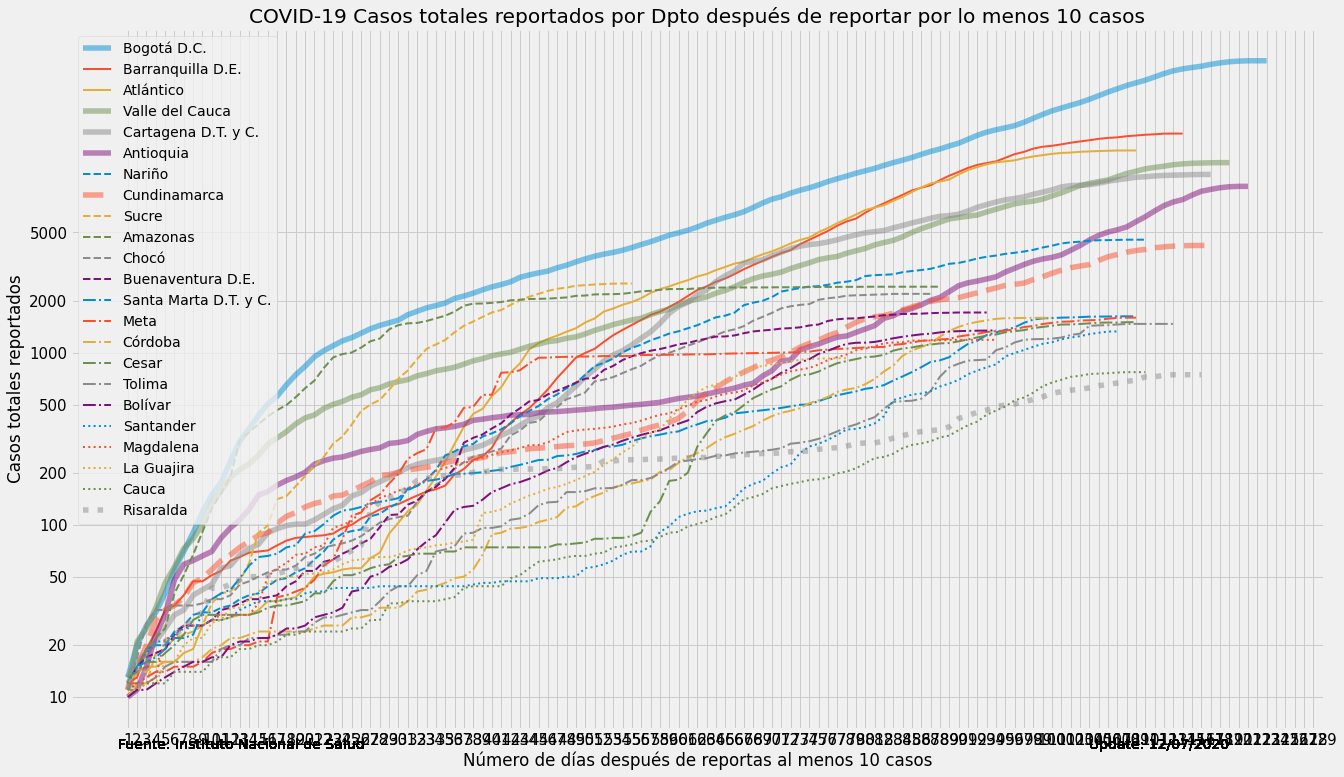

In [69]:
plot_history(total_cases, low_cases=10, high_cases=100000, max_periods=130)

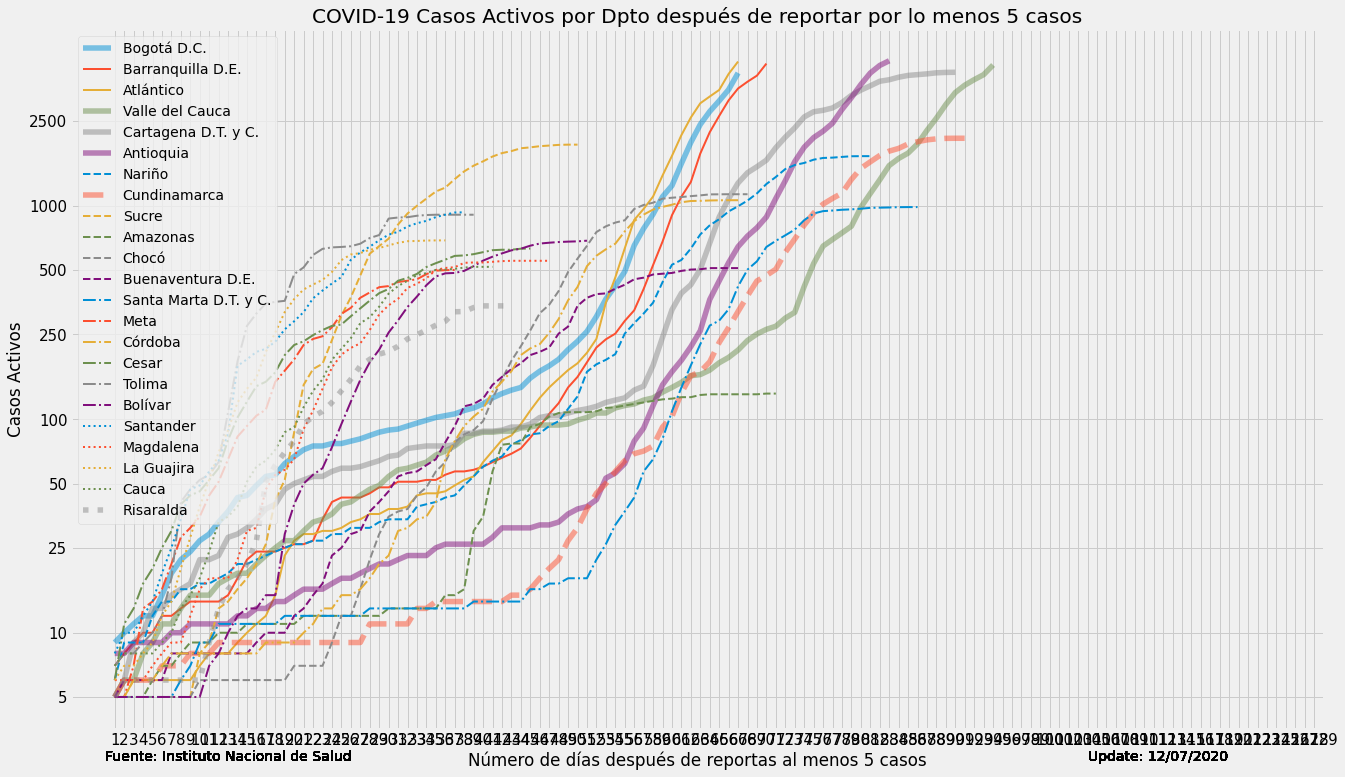

In [73]:
plot_history(active_cases, low_cases=5, high_cases=5000, max_periods=130, title="Casos Activos")

In [74]:
df

,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,pertenencia_etnica,nombre_grupo_etnico,fecha_de_muerte,Asintomatico,divipola_dpto,divipola_mpio,rango_edad,activos,Fecha
id_de_caso,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27,2020-03-06,2020-03-13,2020-03-06,PCR,11,380,Otro,NaN,NaT,0,11,1,"(10.0, 20.0]",False,2020-03-02
2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04,2020-03-09,2020-03-19,2020-03-09,PCR,76,724,Otro,NaN,NaT,0,76,111,"(30.0, 40.0]",False,2020-03-06
3,2020-03-07,05001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29,2020-03-09,2020-03-15,2020-03-09,PCR,5,724,Otro,NaN,NaT,0,5,1,"(40.0, 50.0]",False,2020-03-07
4,2020-03-09,05001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,nan,2020-03-06,2020-03-11,2020-03-26,2020-03-11,PCR,5,nan,Otro,NaN,NaT,0,5,1,"(50.0, 60.0]",False,2020-03-09
5,2020-03-09,05001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,nan,2020-03-08,2020-03-11,2020-03-23,2020-03-11,PCR,5,nan,Otro,NaN,NaT,0,5,1,"(20.0, 30.0]",False,2020-03-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150481,2020-07-06,11001,Bogotá D.C.,Bogotá D.C.,Casa,30,M,En estudio,Leve,nan,2020-06-22,2020-07-12,NaT,2020-07-12,nan,11,nan,nan,NaN,NaT,0,11,1,"(20.0, 30.0]",True,2020-07-06
150482,2020-07-09,66001,Pereira,Risaralda,Hospital,22,F,En estudio,Moderado,nan,2020-06-30,2020-07-12,NaT,2020-07-12,nan,66,nan,nan,NaN,NaT,0,66,1,"(20.0, 30.0]",True,2020-07-09
150483,2020-07-06,66001,Pereira,Risaralda,Casa,16,F,En estudio,Leve,nan,2020-07-06,2020-07-12,NaT,2020-07-12,nan,66,nan,nan,NaN,NaT,0,66,1,"(10.0, 20.0]",True,2020-07-06


In [75]:
total_cases.index[:7]

Index(['Bogotá D.C.', 'Barranquilla D.E.', 'Atlántico', 'Valle del Cauca',
       'Cartagena D.T. y C.', 'Antioquia', 'Nariño'],
      dtype='object', name='departamento')

In [76]:
top_departments = df[df['departamento'].isin(total_cases.index[:5])]

In [77]:
top_departments['Fecha'] = top_departments['Fecha'].dt.strftime('%m-%d')

/Users/camilovelasquez/anaconda3/envs/censo/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


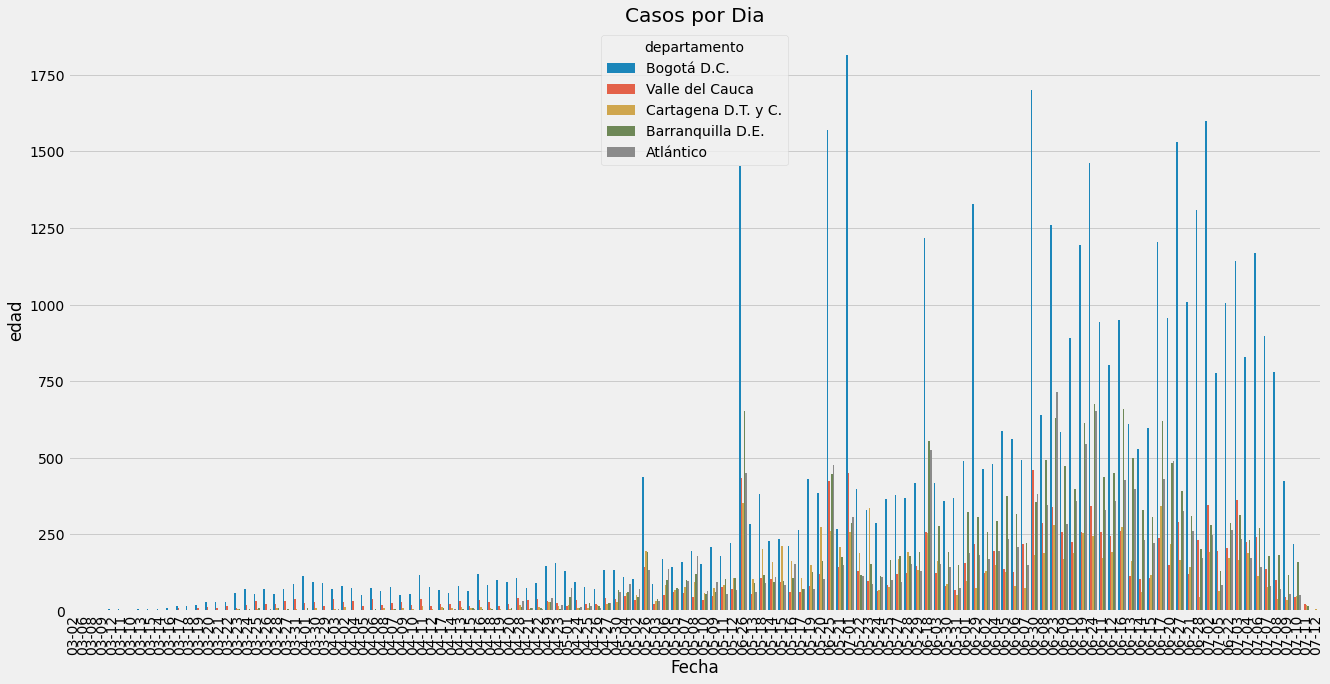

In [78]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='Fecha', y='edad', data=top_departments, hue='departamento', estimator=len, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Casos por Dia")
plt.show()